In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [231]:
df_ = pd.read_csv("SCcontactDBmodifiedFBBAugust2020.csv")
#"SC-List.csv")
df_.dropna(subset=["Email"]).Email.map(lambda x: x.strip().split(".")[-1]).unique()

array(['edu', 'cl', 'it', 'com', 'de', 'uk', 'global', 'si', 'za', 'gov',
       'fr', 'nz', 'org', 'rs', 'se', 'tw', 'nl', 'hu', 'pl', 'net', 'ca',
       'br', 'cn', 'au', 'cz', 'mil', 'fi', 'es', 'dk'], dtype=object)

In [232]:
df_[df_["Last Name"] == "Bechtol"]

,Company,Email,First Name,Last Name,SC,state
858,NaN,NaN,Keith,Bechtol,DESC,NaN


In [233]:
df_[df_.Email.isna()]

,Company,Email,First Name,Last Name,SC,state
844,NaN,NaN,Husni,Almoubayyed,DESC,NaN
848,NaN,NaN,Pierre,Astier,DESC,NaN
858,NaN,NaN,Keith,Bechtol,DESC,NaN
860,NaN,NaN,Matthew,Becker,DESC,NaN
863,NaN,NaN,Guillaume,Blanc,DESC,NaN
864,NaN,NaN,Jonathan,Blazek,DESC,NaN
865,NaN,NaN,Sebastien,Bongard,DESC,NaN
867,NaN,NaN,James,Bosch,DESC,NaN
868,NaN,NaN,Dominique,Boutigny,DESC,NaN
870,NaN,NaN,Sarah,Bridle,DESC,NaN


In [234]:
tmp = df_.merge(pd.read_csv("descmembers - Sheet1.csv"), 
                on=["First Name","Last Name"], how="inner")

tmp["state"] = [tmp.state_desc.values[i] if isinstance(tmp.state_desc.values[i], str) 
 else tmp.state.values[i] for i in range(len(tmp)) ]
tmp["Email"] = [tmp.email.values[i] if isinstance(tmp.email.values[i], str) 
 else tmp.Email.values[i] for i in range(len(tmp)) ]
df_ = df_.merge(tmp[["First Name","Last Name","state", "Email"]], 
         on=["First Name","Last Name"], how="outer")


In [235]:
df_["Email"] =   [df_.Email_x.values[i] if isinstance(df_.Email_x.values[i], str) 
 else df_.Email_y.values[i] for i in range(len(df_)) ]
df_["state"] =   [df_.state_x.values[i] if isinstance(df_.state_x.values[i], str) 
 else df_.state_y.values[i] for i in range(len(df_)) ]
df_ = df_.drop(["Email_x", "Email_y", "state_x", "state_y"], axis=1)
#.drop_duplicates(subset=["Email"],  keep='first')

In [236]:
df_[df_["Last Name"] == "Bechtol"]

,Company,First Name,Last Name,SC,Email,state
979,NaN,Keith,Bechtol,DESC,us@us.edu,Illinois


In [237]:
for em in df_.drop_duplicates(subset="Email").Email.values:
    if em.strip().split(".")[-1] in ["com", "net", "mil", "org"]:
        print(df_[df_.Email==em].values[0])

['LCOGT/UCSB' 'Iair' 'Arcavi' 'Transients and Variable Stars'
 'arcavi@gmail.com' 'LCOGT/UCSB']
['Las Cumbres Observatory' 'Etienne' 'Bachelet'
 'Transients and Variable Stars' 'etibachelet@gmail.com'
 'Las Cumbres Observatory']
[nan 'Andrew' 'Becker' 'Transients and Variable Stars'
 'acbecker@gmail.com' nan]
['Stockholm University/Oskar Klein Centre' 'Rahul' 'Biswas'
 'Transients and Variable Stars' 'rbiswas4@gmail.com'
 'Stockholm University/Oskar Klein Centre']
[nan 'Todd' 'Boroson' 'Solar System' 'tboroson@lcogt.net' nan]
['Pennsylvania State University' 'Niel' 'Brandt'
 'Transients and Variable Stars' 'wnbrandt@gmail.com'
 'Pennsylvania State University']
[nan 'Tim' 'Brown' 'AGN' 'tbrown@lcogt.net' nan]
['Istituto Nazionale di Astrofisica (INAF)' 'Stefano' 'Cavuoti'
 'Transients and Variable Stars' 'stefano.cavuoti@gmail.com'
 'Istituto Nazionale di Astrofisica (INAF)']
['Northwestern University' 'Deanne' 'Coppejans'
 'Transients and Variable Stars' 'deanne.coppejans@gmail.com'
 '

# sec 1

In [238]:
countries = {"shporeravi@gmail.com":"US",
             'tarun.k.ruchandani@gmail.com':"oth",
             'mustaric@gmail.com':"US",
             'mohammad@akhlaghi.org':"ES",
            'tanguita@gmail.com':"CL",
            'arcavi@gmail.com':"IS",'eric@aubourg.net':"FR", 'kbechtol@lsst.org':"US",
            'rbiswas4@gmail.com':"SW", 'michael.blanton@gmail.com':"US",
           'rblum@lsst.org':"US",
             'bochanski@gmail.com':"US",
'bolin.astro@gmail.com':"oth",
'kirk.borne@gmail.com':"oth",
'tboroson@lcogt.net':"US",
'sarah@sarahbridle.net':"US",
'tbrown@lcogt.net':"US",
'philbull@gmail.com':"oth",
'burninghamster@gmail.com':"oth",
'JCarlin@lsst.org':"US",
'paolo.cassata@gmail.com':"oth",
'stefano.cavuoti@gmail.com':"oth",
'claudiacicone@gmail.com':"oth",
'cclaver@lsst.org':"US",
'conselice@gmail.com':"oth",
'deanne.coppejans@gmail.com':"US",
'michael.w.coughlin@gmail.com':"oth",
'mcuk@seti.org':"US",
'scottvalscott@gmail.com':"oth",
'will@dawsonresearch.com':"US",
'demetradecicco@gmail.com':"oth",
'vpdebattista@gmail.com':"oth",
'jadexter@gmail.com':"oth",
'dhitals@me.com':"oth",
'aaron.dotter@gmail.com':"US",
'siegfried.eggl@gmail.com':"oth",
'timeifler@gmail.com':"oth",
'rossfadely@gmail.com':"US",
'finch@usno.navy.mil':"US",
'merlin.fisherlevine@gmail.com':"oth",
'brendafrye@gmail.com':"US",
'lluisgalbany@gmail.com':"CL",
'genovese.cr@gmail.com':"oth",
'melissalynngraham@gmail.com':"US",
'sarah@b612foundation.org':"US",
'raja@ucolick.org':"US",
'guillochon@gmail.com':"US",
'mhammergren@adlerplanetarium.org':"US",
'harris@att.net':"US",
'willliam.hartley@gmail.com': "oth",
'nphathi@gmail.com':"oth",
'arne@aavso.org':"US",
'benne.holwerda@gmail.com':"oth",
'johanna.itam@gmail.com':"oth",
'savannah.jacklin@gmail.com':"US",
'michael@jarvis.net':"US",
'jee.james@gmail.com':"oth",
'jgj@h-bar.com':"US",
'ljones.uw@gmail.com':"US",
'skahn@lsst.org':"US",
'jbkalmbach@gmail.com':"oth",
'vishal.kasliwal@gmail.com':"US",
'lee.s.kelvin@gmail.com':"US",
'somayeh.khakpash@gmail.com':"US",
'krughoff@lsst.org':"US",
'pkurczynski@mac.com':"oth",
'dstndstn@gmail.com':"CA",
'jtlauroesch@gmail.com':"oth",
'dr.michelle.lochner@gmail.com':"SA",
'sloebman@yahoo.com':"oth",
'loucks@see.com':"oth",
'mike.lund@gmail.com':"US",
'fidelluque@gmail.com':"oth",
'yymao.astro@gmail.com':"oth",
'vera.margoniner@gmail.com':"oth",
'rafmargutti@gmail.com':"US",
'dr.phil.marshall@gmail.com':"US",
'tmcclintock89@gmail.com':"oth",
'peregrine.mcgehee@gmail.com':"US",
'gerhardt.meurer@icrar.org':"oth",
'jmeyers314@gmail.com':"oth",
'andresmezac@gmail.com':"oth",
'mmodjaz@gmail.com':"US",
'lmonaco1976@gmail.com':"oth",
'dgmonet@gmail.com':"US",
'mirela.obric@gmail.com':"oth",
'elle.ojala@gmail.com ':"US",
'alexharrisonparker@gmail.com':"US",
'matthewjohnpayne@gmail.com':"oth",
'jean-marc.petit@normalesup.org':"FR",
'cpetry@lsst.org':"US",
'pignago@gmail.com':"oth",
'silvia.piranomonte@gmail.com':"oth",
'plazasmalagon@gmail.com':"CL",
'tpuzia@gmail.com':"oth",
'joeyrichar@gmail.com':"oth",
'adric.riedel@gmail.com':"oth",
'crockosi@ucolick.org':"US",
'rodriguez.jr.joey@gmail.com':"oth",
'wrosing@lcogt.net':"US",
'gugabrossi@gmail.com':"oth",
'mschwamb.astro@gmail.com':"UK",
'ryan.scranton@gmail.com':"oth",
'erin.sheldon@gmail.com':"oth",
'jsick@lsst.org':"US",
'aspitz@lsst.org':"US",
'sastanford@mac.com':"oth",
'katrien.steenbrugge@gmail.com':"oth",
'jsstuart@gmail.com':"US",
'subasavage@nofs.navy.mil':"US",
'hyungusk.tak@gmail.com':"oth",
'ntejos@ucolick.org':"US",
'tissera.patriciab@gmail.com':"oth",
'stfn.valenti@gmail.com':"US",
'l.m.walkowicz@gmail.com':"US",
'jfwallin@gmail.com':"oth",
'mwellsa@gmail.com': "US",
'wenaus@gmail.com':"oth",
'matthewwiesner@aol.com':"oth",
'gmwilliger@gmail.com':"US",
'bwillman@lsst.org':"US",
'padmayf@gmail.com':"US",
'adizolotov@gmail.com':"US",
'joezuntz@googlemail.com':"oth",
            "etibachelet@gmail.com":"US",
            "acbecker@gmail.com":"US",
            "wnbrandt@gmail.com":"US",
            "dicrisci@gmail.com":"IT",
            "francisco.forster@gmail.com":"CL",
            "danielgodinez123@gmail.com":"oth",
            "leanne.guy@lsst.org":"US",
            "kmhambleton@gmail.com":"US",
            "skafka@aavso.org":"US",
            "fred.moolekamp@gmail.com":"US",
            "richard.oshaughnessy@ligo.org":"oth",
            "plavchan@gmail.com":"oth",
            "tylerapritchard@gmail.com":"US",
            "jrho@seti.org":"US"}

In [239]:
countrymap = {"gov":"US", "us":"US", 'edu':"US", 'br':"BR", 
              'uk':"UK", 'cl':"CL", 'cr':'CR','sw':'SW',
              'se':"SW", 'nl':"NL",
              'fr':"FR", 'it':"IT", 
              'ca':"CA", 
              'au':"AU", 'es':"ES", 'cn':"CN", 'de':"DE", 
              'pl':"PL", 'nz':"NZ", 
              'cz':"CZ", 
              'si':"SI",
              'fi':"FI", 'rs':"RS", "tw":"TW",
              'global':"US", 'hu':"HU", 'dk':"DK", 'za':'ZA'}
for c in countries.values():
    countrymap[c.lower()] = c
countrymap    

{'gov': 'US',
 'us': 'US',
 'edu': 'US',
 'br': 'BR',
 'uk': 'UK',
 'cl': 'CL',
 'cr': 'CR',
 'sw': 'SW',
 'se': 'SW',
 'nl': 'NL',
 'fr': 'FR',
 'it': 'IT',
 'ca': 'CA',
 'au': 'AU',
 'es': 'ES',
 'cn': 'CN',
 'de': 'DE',
 'pl': 'PL',
 'nz': 'NZ',
 'cz': 'CZ',
 'si': 'SI',
 'fi': 'FI',
 'rs': 'RS',
 'tw': 'TW',
 'global': 'US',
 'hu': 'HU',
 'dk': 'DK',
 'za': 'ZA',
 'oth': 'oth',
 'is': 'IS',
 'sa': 'SA'}

In [240]:
df_.groupby("SC").count()

,Company,First Name,Last Name,Email,state
SC,,,,,
AGN,0,54,54,54,0
DESC,17,215,215,215,75
Galaxies,0,106,106,106,0
Solar System,0,94,94,94,0
"Stars, Milky Way, and Local Volume",0,237,237,237,0
Statistics and Informatics,0,70,70,70,0
Strong Lensing,0,43,43,43,0
Transients and Variable Stars,233,237,237,237,233


In [241]:
affiliations = []
N = len(df_.index.values)
for i,ind in enumerate(df_.index.values):
    print (i, ",", N)
    n1 = "".join(df_.loc[ind, ["First Name","Last Name"]]).strip()
    for j in df_.index.values[i+1:]:
        if n1 == "".join(df_.loc[j, ["First Name","Last Name"]]):
            if not df_.loc[ind, "SC"] == df_.loc[j, "SC"]:
                affiliations.append((n1, df_.loc[ind, "SC"],
                  df_.loc[j, "SC"]))


0 , 1056
1 , 1056
2 , 1056
3 , 1056
4 , 1056
5 , 1056
6 , 1056
7 , 1056
8 , 1056
9 , 1056
10 , 1056
11 , 1056
12 , 1056
13 , 1056
14 , 1056
15 , 1056
16 , 1056
17 , 1056
18 , 1056
19 , 1056
20 , 1056
21 , 1056
22 , 1056
23 , 1056
24 , 1056
25 , 1056
26 , 1056
27 , 1056
28 , 1056
29 , 1056
30 , 1056
31 , 1056
32 , 1056
33 , 1056
34 , 1056
35 , 1056
36 , 1056
37 , 1056
38 , 1056
39 , 1056
40 , 1056
41 , 1056
42 , 1056
43 , 1056
44 , 1056
45 , 1056
46 , 1056
47 , 1056
48 , 1056
49 , 1056
50 , 1056
51 , 1056
52 , 1056
53 , 1056
54 , 1056
55 , 1056
56 , 1056
57 , 1056
58 , 1056
59 , 1056
60 , 1056
61 , 1056
62 , 1056
63 , 1056
64 , 1056
65 , 1056
66 , 1056
67 , 1056
68 , 1056
69 , 1056
70 , 1056
71 , 1056
72 , 1056
73 , 1056
74 , 1056
75 , 1056
76 , 1056
77 , 1056
78 , 1056
79 , 1056
80 , 1056
81 , 1056
82 , 1056
83 , 1056
84 , 1056
85 , 1056
86 , 1056
87 , 1056
88 , 1056
89 , 1056
90 , 1056
91 , 1056
92 , 1056
93 , 1056
94 , 1056
95 , 1056
96 , 1056
97 , 1056
98 , 1056
99 , 1056
100 , 1056

755 , 1056
756 , 1056
757 , 1056
758 , 1056
759 , 1056
760 , 1056
761 , 1056
762 , 1056
763 , 1056
764 , 1056
765 , 1056
766 , 1056
767 , 1056
768 , 1056
769 , 1056
770 , 1056
771 , 1056
772 , 1056
773 , 1056
774 , 1056
775 , 1056
776 , 1056
777 , 1056
778 , 1056
779 , 1056
780 , 1056
781 , 1056
782 , 1056
783 , 1056
784 , 1056
785 , 1056
786 , 1056
787 , 1056
788 , 1056
789 , 1056
790 , 1056
791 , 1056
792 , 1056
793 , 1056
794 , 1056
795 , 1056
796 , 1056
797 , 1056
798 , 1056
799 , 1056
800 , 1056
801 , 1056
802 , 1056
803 , 1056
804 , 1056
805 , 1056
806 , 1056
807 , 1056
808 , 1056
809 , 1056
810 , 1056
811 , 1056
812 , 1056
813 , 1056
814 , 1056
815 , 1056
816 , 1056
817 , 1056
818 , 1056
819 , 1056
820 , 1056
821 , 1056
822 , 1056
823 , 1056
824 , 1056
825 , 1056
826 , 1056
827 , 1056
828 , 1056
829 , 1056
830 , 1056
831 , 1056
832 , 1056
833 , 1056
834 , 1056
835 , 1056
836 , 1056
837 , 1056
838 , 1056
839 , 1056
840 , 1056
841 , 1056
842 , 1056
843 , 1056
844 , 1056
845 , 1056

In [242]:
affiliations = np.load("affiliations.npy")

In [243]:
np.save("affiliations.npy", np.array(affiliations))

In [244]:
df_.head()


,Company,First Name,Last Name,SC,Email,state
0,University of Washington,Eric,Agol,Transients and Variable Stars,agol@astro.washington.edu,Washington
1,NaN,Eric,Agol,Strong Lensing,agol@astro.washington.edu,NaN
2,NaN,Javier,Alonso-Garcia,Transients and Variable Stars,javier.alonso@uantof.cl,NaN
3,NaN,Javier,Alonso-Garcia,"Stars, Milky Way, and Local Volume",javier.alonso@uantof.cl,NaN
4,University of Washington,Scott,Anderson,Transients and Variable Stars,anderson@astro.washington.edu,Washington


In [245]:
df_['First Name'].values[1].replace(" ", "")

'Eric'

In [246]:
df_['name'] = (df_['Last Name'].str.replace("","").str.replace(" ","") + 
               df_['First Name'].str.replace(" ","").str.replace(" ",
            "")).str.replace(" ","").str.replace("''","")

affiliationsDF = pd.get_dummies(df_.set_index('name')["SC"])
affiliationsDF

,AGN,DESC,Galaxies,Solar System,"Stars, Milky Way, and Local Volume",Statistics and Informatics,Strong Lensing,Transients and Variable Stars
name,,,,,,,,
AgolEric,0,0,0,0,0,0,0,1
AgolEric,0,0,0,0,0,0,1,0
Alonso-GarciaJavier,0,0,0,0,0,0,0,1
Alonso-GarciaJavier,0,0,0,0,1,0,0,0
AndersonScott,0,0,0,0,0,0,0,1
AndersonScott,0,0,0,0,0,1,0,0
AndreoniIgor,0,0,0,0,0,0,0,1
AntoninoCucchiara,0,0,0,0,0,0,0,1
AntoniucciSimone,0,0,0,0,0,0,0,1


In [247]:
affiliationsDF = affiliationsDF.groupby("name").sum()
affiliationsDF.replace(2,1, inplace=True)
affiliationsDF.replace(3,1, inplace=True)

In [248]:
affiliations

array([['EricAgol', 'Transients and Variable Stars', 'Strong Lensing'],
       ['JavierAlonso-Garcia', 'Transients and Variable Stars',
        'Stars, Milky Way, and Local Volume'],
       ['ScottAnderson', 'Transients and Variable Stars',
        'Statistics and Informatics'],
       ...,
       ['AndrewZentner', 'Statistics and Informatics', 'DESC'],
       ['HuZhan', 'Solar System', 'DESC'],
       ['JoeZuntz', 'Stars, Milky Way, and Local Volume', 'DESC']],
      dtype='<U34')

In [249]:
affiliationset = (list(affiliations))

In [250]:
affiliationset

[array(['EricAgol', 'Transients and Variable Stars', 'Strong Lensing'],
       dtype='<U34'),
 array(['JavierAlonso-Garcia', 'Transients and Variable Stars',
        'Stars, Milky Way, and Local Volume'], dtype='<U34'),
 array(['ScottAnderson', 'Transients and Variable Stars',
        'Statistics and Informatics'], dtype='<U34'),
 array(['IairArcavi', 'Transients and Variable Stars', 'Galaxies'],
       dtype='<U34'),
 array(['AndrewBecker', 'Transients and Variable Stars', 'AGN'],
       dtype='<U34'),
 array(['AndrewBecker', 'Transients and Variable Stars', 'DESC'],
       dtype='<U34'),
 array(['EricBellm', 'Transients and Variable Stars',
        'Stars, Milky Way, and Local Volume'], dtype='<U34'),
 array(['EdoBerger', 'Transients and Variable Stars',
        'Stars, Milky Way, and Local Volume'], dtype='<U34'),
 array(['FedericaBianco', 'Transients and Variable Stars',
        'Stars, Milky Way, and Local Volume'], dtype='<U34'),
 array(['RahulBiswas', 'Transients and Variable St

In [251]:
df_["SC"].unique()

array(['Transients and Variable Stars', 'Strong Lensing',
       'Stars, Milky Way, and Local Volume', 'Statistics and Informatics',
       'Galaxies', 'AGN', 'DESC', 'Solar System'], dtype=object)

In [372]:
propernames = {"Transients and Variable Stars":'TVSSC', 
               'Solar System':'SSSC', 
               'Strong Lensing':'SLSC', 
               'DESC':'DESC', 
               'Galaxies':'GalaxiesSC',
               'AGN':'AGNSC', 
               'Stars, Milky Way, and Local Volume':'SMWLVSC',
               'Statistics and Informatics':'ISSC'}
def hex_to_rgba(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(list(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3)) + [1])

properhexcolors = {"TVSSC":"#88ccee",
               'SSSC':"#aa4499",
               'SLSC':"#882299", ##882255", 
               'DESC':"#cc6677", 
               'GalaxiesSC':"#ddcc77",
               'AGNSC':"#999933", 
               'SMWLVSC': "#117733",
               'ISSC':"#332288"}
propercolors = {"Transients and Variable Stars":properhexcolors[propernames["Transients and Variable Stars"]],
                'Solar System':properhexcolors[propernames['Solar System']],
               'Strong Lensing':properhexcolors[propernames["Strong Lensing"]], 
               'DESC':properhexcolors[propernames["DESC"]], 
               'Galaxies':properhexcolors[propernames["Galaxies"]],
               'AGN':properhexcolors[propernames["AGN"]], 
               'Stars, Milky Way, and Local Volume': properhexcolors[propernames["Stars, Milky Way, and Local Volume"]],
               'Statistics and Informatics':properhexcolors[propernames["Statistics and Informatics"]]}
propercolorsNat = {"Transients and Variable Stars":properhexcolors[propernames["Transients and Variable Stars"]],
                'Solar System':properhexcolors[propernames['Solar System']],
               'Strong Lensing':properhexcolors[propernames["Strong Lensing"]], 
               'DESC':properhexcolors[propernames["DESC"]], 
               'Galaxies':properhexcolors[propernames["Galaxies"]],
               'AGN':properhexcolors[propernames["AGN"]], 
               'Stars, Milky Way, and Local Volume': properhexcolors[propernames["Stars, Milky Way, and Local Volume"]],
               'Statistics and Informatics':properhexcolors[propernames["Statistics and Informatics"]]}

sccolor = {}

countrycolor = {}

def rgb2hex(x):
    print(x)
    if isinstance(x[0], float):
        r = (x[0]*255).astype(np.uint8)
        g = (x[1]*255).astype(np.uint8)
        b = (x[2]*255).astype(np.uint8)
        print(r,g,b)
        return "#{0:02x}{1:02x}{2:02x}".format(max(r, min(r, 255)), 
                                           max(g, min(g, 255)),
                                           max(b, min(b, 255)))
    return "#{0:02x}{1:02x}{2:02x}".format(max(x[0], min(x[0], 255)), 
                                           max(x[1], min(x[1], 255)),
                                           max(x[2], min(x[2], 255)))

   
print(rgb2hex((0,1,255)))


import pylab
NUM_COLORS = len(countrymap)+1

cm = pylab.get_cmap('viridis')
for i,cc in enumerate(countrymap.values()):
    print(cc)
    if cc in ['US']: 
        print("here")
        countrycolor[cc] = rgb2hex((192,192,192))
    else: 
        countrycolor[cc] = rgb2hex(cm(1.*i / (NUM_COLORS))[:-1])
    print(countrycolor[cc])

    



NUM_COLORS = 8

cm = pylab.get_cmap('viridis')
for i,cc in enumerate(propernames.values()):
    sccolor[cc] = rgb2hex((0, 128, 64))
    
propercolors, countrycolor


(0, 1, 255)
#0001ff
US
here
(192, 192, 192)
#c0c0c0
US
here
(192, 192, 192)
#c0c0c0
US
here
(192, 192, 192)
#c0c0c0
BR
(0.282884, 0.13592, 0.453427)
72 34 115
#482273
UK
(0.278826, 0.17549, 0.483397)
71 44 123
#472c7b
CL
(0.270595, 0.214069, 0.507052)
69 54 129
#453681
CR
(0.258965, 0.251537, 0.524736)
66 64 133
#424085
SW
(0.244972, 0.287675, 0.53726)
62 73 137
#3e4989
SW
(0.229739, 0.322361, 0.545706)
58 82 139
#3a528b
NL
(0.214298, 0.355619, 0.551184)
54 90 140
#365a8c
FR
(0.19943, 0.387607, 0.554642)
50 98 141
#32628d
IT
(0.185556, 0.41857, 0.556753)
47 106 141
#2f6a8d
CA
(0.172719, 0.448791, 0.557885)
44 114 142
#2c728e
AU
(0.160665, 0.47854, 0.558115)
40 122 142
#287a8e
ES
(0.149039, 0.508051, 0.55725)
38 129 142
#26818e
CN
(0.13777, 0.537492, 0.554906)
35 137 141
#23898d
DE
(0.127568, 0.566949, 0.550556)
32 144 140
#20908c
PL
(0.120565, 0.596422, 0.543611)
30 152 138
#1e988a
NZ
(0.120638, 0.625828, 0.533488)
30 159 136
#1e9f88
CZ
(0.132268, 0.655014, 0.519661)
33 167 132
#21a784

({'Transients and Variable Stars': '#88ccee',
  'Solar System': '#aa4499',
  'Strong Lensing': '#882299',
  'DESC': '#cc6677',
  'Galaxies': '#ddcc77',
  'AGN': '#999933',
  'Stars, Milky Way, and Local Volume': '#117733',
  'Statistics and Informatics': '#332288'},
 {'US': '#c0c0c0',
  'BR': '#482273',
  'UK': '#472c7b',
  'CL': '#453681',
  'CR': '#424085',
  'SW': '#3a528b',
  'NL': '#365a8c',
  'FR': '#32628d',
  'IT': '#2f6a8d',
  'CA': '#2c728e',
  'AU': '#287a8e',
  'ES': '#26818e',
  'CN': '#23898d',
  'DE': '#20908c',
  'PL': '#1e988a',
  'NZ': '#1e9f88',
  'CZ': '#21a784',
  'SI': '#28ae7f',
  'FI': '#32b57a',
  'RS': '#3ebc73',
  'TW': '#4dc26b',
  'HU': '#70ce56',
  'DK': '#83d34b',
  'ZA': '#97d83e',
  'oth': '#addc30',
  'IS': '#c2df22',
  'SA': '#d7e219'})

In [375]:
affiliationsDF

,AGN,DESC,Galaxies,Solar System,"Stars, Milky Way, and Local Volume",Statistics and Informatics,Strong Lensing,Transients and Variable Stars
name,,,,,,,,
AbellPaulAlexander,0,0,0,1,0,0,0,0
AgolEric,0,0,0,0,0,0,1,1
AguenaMichel,0,1,0,0,0,0,0,0
AguerosMarcel,0,0,0,0,0,0,1,0
AkhlaghiMohammad,0,0,1,0,0,0,0,0
AlderingGreg,0,1,0,0,0,0,0,0
AllenMark,0,0,0,0,0,0,1,0
AllenSteven,0,1,0,0,0,0,0,0
AlmeydaTriana,1,0,0,0,0,0,0,0


In [376]:
df_

,Company,First Name,Last Name,SC,Email,state,name
0,University of Washington,Eric,Agol,Transients and Variable Stars,agol@astro.washington.edu,Washington,AgolEric
1,NaN,Eric,Agol,Strong Lensing,agol@astro.washington.edu,NaN,AgolEric
2,NaN,Javier,Alonso-Garcia,Transients and Variable Stars,javier.alonso@uantof.cl,NaN,Alonso-GarciaJavier
3,NaN,Javier,Alonso-Garcia,"Stars, Milky Way, and Local Volume",javier.alonso@uantof.cl,NaN,Alonso-GarciaJavier
4,University of Washington,Scott,Anderson,Transients and Variable Stars,anderson@astro.washington.edu,Washington,AndersonScott
5,NaN,Scott,Anderson,Statistics and Informatics,anderson@astro.washington.edu,NaN,AndersonScott
6,Caltech,Igor,Andreoni,Transients and Variable Stars,andreoni@caltech.edu,Caltech,AndreoniIgor
7,University of the Virgin Islands,Cucchiara,Antonino,Transients and Variable Stars,antonino.cucchiara@uvi.edu,the Virgin Islands,AntoninoCucchiara
8,INAF - Osservatorio Astronomico di Roma,Simone,Antoniucci,Transients and Variable Stars,simone.antoniucci@inaf.it,INAF - Osservatorio Astronomico di Roma,AntoniucciSimone
9,LCOGT/UCSB,Iair,Arcavi,Transients and Variable Stars,arcavi@gmail.com,LCOGT/UCSB,ArcaviIair


In [377]:
f = open("affnodes.txt", "w")
#for i in df_["Contact Category"].unique():
#    f.write('"'+propernames[i].replace(" ","_") + '"\n')
#f.close()

for n in affiliationsDF.index.values:
    f.write(n + '\n')
f.close()

In [378]:
affiliationsDF.index.values

array(['AbellPaulAlexander', 'AgolEric', 'AguenaMichel', 'AguerosMarcel',
       'AkhlaghiMohammad', 'AlderingGreg', 'AllenMark', 'AllenSteven',
       'AlmeydaTriana', 'AlmoubayyedHusni', 'Alonso-GarciaJavier',
       'AlonsoDavid', 'AnderesEthan', 'AndersonScott', 'AndreoniIgor',
       'AnguitaTimo', 'AnsariReza', 'AntilogusPierre',
       'AntoninoCucchiara', 'AntoniucciSimone', 'ArcaviIair',
       'ArgudoFernandezMariadelCarmen', 'ArmusLee', 'ArnettDavid',
       'ArnettW.David', 'AssefRoberto', 'AstierPierre', 'AubourgEric',
       'AvestruzCamille', 'AwanHumna', 'BacheletEtienne', 'BaileyStephen',
       'BailynCharles', 'BaldeschiAdriano', 'BallandChristophe',
       'BalmaverdeBarbara', 'BaloghMichael', 'BandaMartin',
       'BanerjiManda', 'BannisterMichele', 'BarbaRodolfo',
       'BarbieriMauro', 'BardDeborah', 'BarrauAurelien', 'BarreraLuis',
       'BarrientosFelipe', 'BartlettJames', 'BassGideon', 'BauerFranz',
       'BaumerMichael', 'BeanRachel', 'BechtolKeith', 'Beck

In [379]:
 df_['name']

0                  AgolEric
1                  AgolEric
2       Alonso-GarciaJavier
3       Alonso-GarciaJavier
4             AndersonScott
5             AndersonScott
6              AndreoniIgor
7         AntoninoCucchiara
8          AntoniucciSimone
9                ArcaviIair
10               ArcaviIair
11              ArnettDavid
12          BacheletEtienne
13         BaldeschiAdriano
14        BalmaverdeBarbara
15             BeckerAndrew
16             BeckerAndrew
17             BeckerAndrew
18               BellKeaton
19                BellmEric
20                BellmEric
21                BergerEdo
22                BergerEdo
23             BersierDavid
24       BhattacharyaAparna
25           BiancoFederica
26           BiancoFederica
27              BiswasRahul
28              BiswasRahul
29                BloomJosh
               ...         
1026            MaoYao-Yuan
1027         MarshallPhilip
1028       McClintockThomas
1029            MorrisGlenn
1030     Muthukrishn

# sec 2

In [380]:
import networkx as nx
p = {}
c = {}
countrylabel = {}
affiliationsDF.fillna("USA", inplace=True)
for i,n1 in enumerate(affiliationsDF.index.values):
    if  isinstance(n1, str): 
        p[n1] = propernames[df_[df_['name'] == n1]["SC"].values[0].strip().lstrip()]
        #propercolors[df_[df_['name'] == n1]["Contact Category"].values[0].strip().lstrip()]
        tmp_ = df_[df_['name'] == n1]["Email"].fillna(" ").values[0]
        if tmp_.strip().split('.')[-1] in countrymap:
            c[n1] = countrycolor[countrymap[tmp_.strip().split('.')[-1]]]
            countrylabel[n1] = countrymap[tmp_.strip().split('.')[-1]]
        else:
            c[n1] = countrycolor[countries[df_[df_['name'] == n1]["Email"].values[0]]]
            countrylabel[n1] = countries[df_[df_['name'] == n1]["Email"].values[0]]

    
p   

{'AbellPaulAlexander': 'SSSC',
 'AgolEric': 'TVSSC',
 'AguenaMichel': 'DESC',
 'AguerosMarcel': 'SLSC',
 'AkhlaghiMohammad': 'GalaxiesSC',
 'AlderingGreg': 'DESC',
 'AllenMark': 'SLSC',
 'AllenSteven': 'DESC',
 'AlmeydaTriana': 'AGNSC',
 'AlmoubayyedHusni': 'DESC',
 'Alonso-GarciaJavier': 'TVSSC',
 'AlonsoDavid': 'DESC',
 'AnderesEthan': 'SMWLVSC',
 'AndersonScott': 'TVSSC',
 'AndreoniIgor': 'TVSSC',
 'AnguitaTimo': 'AGNSC',
 'AnsariReza': 'GalaxiesSC',
 'AntilogusPierre': 'DESC',
 'AntoninoCucchiara': 'TVSSC',
 'AntoniucciSimone': 'TVSSC',
 'ArcaviIair': 'TVSSC',
 'ArgudoFernandezMariadelCarmen': 'SMWLVSC',
 'ArmusLee': 'SMWLVSC',
 'ArnettDavid': 'TVSSC',
 'ArnettW.David': 'GalaxiesSC',
 'AssefRoberto': 'GalaxiesSC',
 'AstierPierre': 'DESC',
 'AubourgEric': 'AGNSC',
 'AvestruzCamille': 'GalaxiesSC',
 'AwanHumna': 'SLSC',
 'BacheletEtienne': 'TVSSC',
 'BaileyStephen': 'SSSC',
 'BailynCharles': 'ISSC',
 'BaldeschiAdriano': 'TVSSC',
 'BallandChristophe': 'ISSC',
 'BalmaverdeBarbara': 'TV

In [381]:
cols = affiliationsDF.columns
affdic = {}
f = open("affedges.txt", "w")
for i,n1 in enumerate(affiliationsDF.index.values):
    affdic[n1] = {}
    for n2 in affiliationsDF.index.values[i+1:]:
        for c in cols:
            
            if affiliationsDF.loc[n1,c] > 0:
                if affiliationsDF.loc[n2,c] > 0:
                    f.write(n1 + " "  + n2  +'\n')
                    affdic[n1][n2] = {"color" : p[n1]} 

f.close()

In [382]:
my_graph = nx.Graph()
edges = nx.read_edgelist('affedges.txt')
nodes = nx.read_adjlist("affnodes.txt")


In [383]:
countrylabel

{'AbellPaulAlexander': 'US',
 'AgolEric': 'US',
 'AguenaMichel': 'BR',
 'AguerosMarcel': 'US',
 'AkhlaghiMohammad': 'ES',
 'AlderingGreg': 'US',
 'AllenMark': 'US',
 'AllenSteven': 'US',
 'AlmeydaTriana': 'UK',
 'AlmoubayyedHusni': 'US',
 'Alonso-GarciaJavier': 'CL',
 'AlonsoDavid': 'UK',
 'AnderesEthan': 'US',
 'AndersonScott': 'US',
 'AndreoniIgor': 'US',
 'AnguitaTimo': 'CL',
 'AnsariReza': 'FR',
 'AntilogusPierre': 'FR',
 'AntoninoCucchiara': 'US',
 'AntoniucciSimone': 'IT',
 'ArcaviIair': 'IS',
 'ArgudoFernandezMariadelCarmen': 'CL',
 'ArmusLee': 'US',
 'ArnettDavid': 'US',
 'ArnettW.David': 'US',
 'AssefRoberto': 'CL',
 'AstierPierre': 'FR',
 'AubourgEric': 'FR',
 'AvestruzCamille': 'US',
 'AwanHumna': 'US',
 'BacheletEtienne': 'US',
 'BaileyStephen': 'US',
 'BailynCharles': 'US',
 'BaldeschiAdriano': 'US',
 'BallandChristophe': 'FR',
 'BalmaverdeBarbara': 'IT',
 'BaloghMichael': 'CA',
 'BandaMartin': 'BR',
 'BanerjiManda': 'UK',
 'BannisterMichele': 'UK',
 'BarbaRodolfo': 'CL',


{0: {1: {}, 2: {}}, 2: {1: {}}}

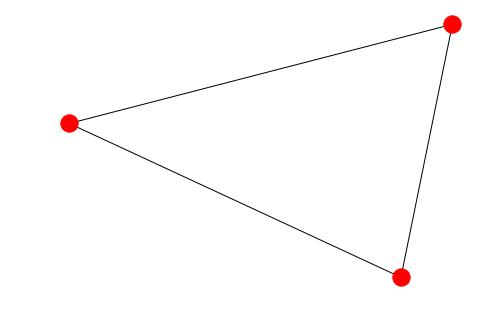

In [384]:
d = {0: {1: {}, 2: {}},
    2: {1: {}}} # dict-of-dicts single edge (0,1)

G = nx.Graph(d, multigraph_input =True)
nx.draw(G, with_labels=False, font_weight='bold')
d

In [385]:
G

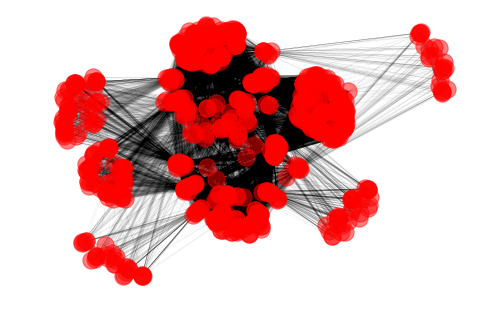

In [386]:
G = nx.Graph(affdic, multigraph_input =True)
nx.draw(G, with_labels=False, width=0.03, alpha=0.5)

In [387]:
p

{'AbellPaulAlexander': 'SSSC',
 'AgolEric': 'TVSSC',
 'AguenaMichel': 'DESC',
 'AguerosMarcel': 'SLSC',
 'AkhlaghiMohammad': 'GalaxiesSC',
 'AlderingGreg': 'DESC',
 'AllenMark': 'SLSC',
 'AllenSteven': 'DESC',
 'AlmeydaTriana': 'AGNSC',
 'AlmoubayyedHusni': 'DESC',
 'Alonso-GarciaJavier': 'TVSSC',
 'AlonsoDavid': 'DESC',
 'AnderesEthan': 'SMWLVSC',
 'AndersonScott': 'TVSSC',
 'AndreoniIgor': 'TVSSC',
 'AnguitaTimo': 'AGNSC',
 'AnsariReza': 'GalaxiesSC',
 'AntilogusPierre': 'DESC',
 'AntoninoCucchiara': 'TVSSC',
 'AntoniucciSimone': 'TVSSC',
 'ArcaviIair': 'TVSSC',
 'ArgudoFernandezMariadelCarmen': 'SMWLVSC',
 'ArmusLee': 'SMWLVSC',
 'ArnettDavid': 'TVSSC',
 'ArnettW.David': 'GalaxiesSC',
 'AssefRoberto': 'GalaxiesSC',
 'AstierPierre': 'DESC',
 'AubourgEric': 'AGNSC',
 'AvestruzCamille': 'GalaxiesSC',
 'AwanHumna': 'SLSC',
 'BacheletEtienne': 'TVSSC',
 'BaileyStephen': 'SSSC',
 'BailynCharles': 'ISSC',
 'BaldeschiAdriano': 'TVSSC',
 'BallandChristophe': 'ISSC',
 'BalmaverdeBarbara': 'TV

In [388]:
nx.set_node_attributes(G, p, "SC")

In [389]:
nx.set_node_attributes(G, countrylabel, "Nationality")

In [390]:
G.nodes.data()


NodeDataView({'AbellPaulAlexander': {'SC': 'SSSC', 'Nationality': 'US'}, 'AgolEric': {'SC': 'TVSSC', 'Nationality': 'US'}, 'AguenaMichel': {'SC': 'DESC', 'Nationality': 'BR'}, 'AguerosMarcel': {'SC': 'SLSC', 'Nationality': 'US'}, 'AkhlaghiMohammad': {'SC': 'GalaxiesSC', 'Nationality': 'ES'}, 'AlderingGreg': {'SC': 'DESC', 'Nationality': 'US'}, 'AllenMark': {'SC': 'SLSC', 'Nationality': 'US'}, 'AllenSteven': {'SC': 'DESC', 'Nationality': 'US'}, 'AlmeydaTriana': {'SC': 'AGNSC', 'Nationality': 'UK'}, 'AlmoubayyedHusni': {'SC': 'DESC', 'Nationality': 'US'}, 'Alonso-GarciaJavier': {'SC': 'TVSSC', 'Nationality': 'CL'}, 'AlonsoDavid': {'SC': 'DESC', 'Nationality': 'UK'}, 'AnderesEthan': {'SC': 'SMWLVSC', 'Nationality': 'US'}, 'AndersonScott': {'SC': 'TVSSC', 'Nationality': 'US'}, 'AndreoniIgor': {'SC': 'TVSSC', 'Nationality': 'US'}, 'AnguitaTimo': {'SC': 'AGNSC', 'Nationality': 'CL'}, 'AnsariReza': {'SC': 'GalaxiesSC', 'Nationality': 'FR'}, 'AntilogusPierre': {'SC': 'DESC', 'Nationality': 'FR

In [391]:
pn = np.array(list(p[c] for c in affiliationsDF.index.values))


In [392]:
pn

array(['SSSC', 'TVSSC', 'DESC', 'SLSC', 'GalaxiesSC', 'DESC', 'SLSC',
       'DESC', 'AGNSC', 'DESC', 'TVSSC', 'DESC', 'SMWLVSC', 'TVSSC',
       'TVSSC', 'AGNSC', 'GalaxiesSC', 'DESC', 'TVSSC', 'TVSSC', 'TVSSC',
       'SMWLVSC', 'SMWLVSC', 'TVSSC', 'GalaxiesSC', 'GalaxiesSC', 'DESC',
       'AGNSC', 'GalaxiesSC', 'SLSC', 'TVSSC', 'SSSC', 'ISSC', 'TVSSC',
       'ISSC', 'TVSSC', 'AGNSC', 'GalaxiesSC', 'SLSC', 'SSSC',
       'GalaxiesSC', 'SSSC', 'SMWLVSC', 'SMWLVSC', 'SMWLVSC', 'SMWLVSC',
       'SSSC', 'GalaxiesSC', 'AGNSC', 'GalaxiesSC', 'DESC', 'DESC',
       'TVSSC', 'DESC', 'SSSC', 'TVSSC', 'ISSC', 'TVSSC', 'SMWLVSC',
       'TVSSC', 'SMWLVSC', 'TVSSC', 'GalaxiesSC', 'TVSSC', 'TVSSC',
       'SMWLVSC', 'TVSSC', 'SSSC', 'DESC', 'ISSC', 'DESC', 'TVSSC',
       'TVSSC', 'GalaxiesSC', 'SLSC', 'GalaxiesSC', 'DESC', 'TVSSC',
       'TVSSC', 'SMWLVSC', 'SSSC', 'SMWLVSC', 'TVSSC', 'TVSSC', 'DESC',
       'SMWLVSC', 'SMWLVSC', 'TVSSC', 'DESC', 'GalaxiesSC', 'ISSC',
       'TVSSC', 'SSSC',

In [393]:
G.nodes

NodeView(('AbellPaulAlexander', 'AgolEric', 'AguenaMichel', 'AguerosMarcel', 'AkhlaghiMohammad', 'AlderingGreg', 'AllenMark', 'AllenSteven', 'AlmeydaTriana', 'AlmoubayyedHusni', 'Alonso-GarciaJavier', 'AlonsoDavid', 'AnderesEthan', 'AndersonScott', 'AndreoniIgor', 'AnguitaTimo', 'AnsariReza', 'AntilogusPierre', 'AntoninoCucchiara', 'AntoniucciSimone', 'ArcaviIair', 'ArgudoFernandezMariadelCarmen', 'ArmusLee', 'ArnettDavid', 'ArnettW.David', 'AssefRoberto', 'AstierPierre', 'AubourgEric', 'AvestruzCamille', 'AwanHumna', 'BacheletEtienne', 'BaileyStephen', 'BailynCharles', 'BaldeschiAdriano', 'BallandChristophe', 'BalmaverdeBarbara', 'BaloghMichael', 'BandaMartin', 'BanerjiManda', 'BannisterMichele', 'BarbaRodolfo', 'BarbieriMauro', 'BardDeborah', 'BarrauAurelien', 'BarreraLuis', 'BarrientosFelipe', 'BartlettJames', 'BassGideon', 'BauerFranz', 'BaumerMichael', 'BeanRachel', 'BechtolKeith', 'BeckerAndrew', 'BeckerMatthew', 'BeersTimothyC.', 'BellKeaton', 'BellagambaFabio', 'BellmEric', 'Be

In [401]:
chairs = ['VermaAprajita','AnguitaTimo','KavirajSugata', 'BiancoFederica',
'StreetRachel', 'MandelbaumRachel', 'GizisJohn', 'ClarksonWilliam', 'McGeheePeregrine',
'SchaferChad']
sizes = [100 if i not in chairs else 300 for i in  affiliationsDF.index.values ]
alphas = [0.2 if i not in chairs else 1 for i in  affiliationsDF.index.values ]
alphas2 = [0.5 #if not countrylabel[i] in ["US"] else 0.1 
           for i in  affiliationsDF.index.values ]
alphas2


[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5

In [402]:
pos = nx.spring_layout(G, seed=123,  weight=0.2, dim=2, fixed=None)


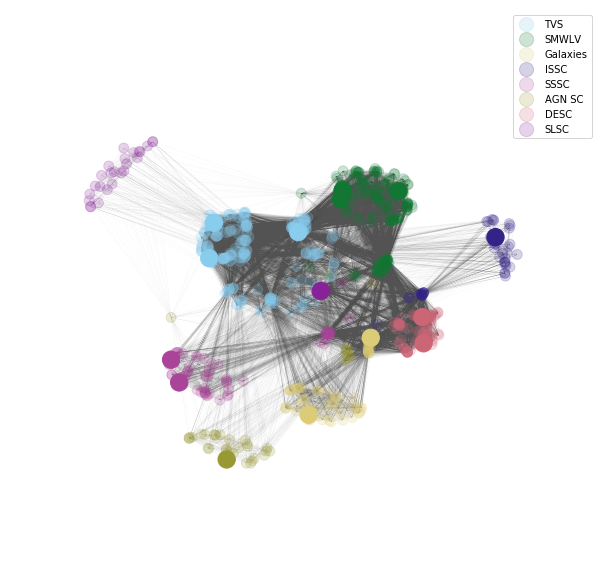

In [403]:
import pylab as pl
pl.figure(figsize=(10,10))
#
pl.xlim(-1.2,1.2)
pl.ylim(-1.5,1.5);
nx.draw_networkx_nodes(G, pos=pos, nodelist=[x for x,y in G.nodes(data=True) if y['SC']=='TVSSC'],
                      node_color=properhexcolors["TVSSC"], cmap='viridis', label='TVS',
                      width=0.03, alpha=alphas, node_size=sizes)

nx.draw_networkx_nodes(G,pos=pos,nodelist=[x for x,y in G.nodes(data=True) if y['SC']=='SMWLVSC'], 
                       node_color=properhexcolors['SMWLVSC'], label='SMWLV', cmap='viridis',
                      width=0.03, alpha=alphas, node_size=sizes)
nx.draw_networkx_nodes(G,pos=pos,nodelist=[x for x,y in G.nodes(data=True) if y['SC']=='GalaxiesSC'], 
                      node_color=properhexcolors['GalaxiesSC'], label='Galaxies', cmap='viridis',
                      width=0.03, alpha=alphas, node_size=sizes)
nx.draw_networkx_nodes(G,pos=pos,nodelist=[x for x,y in G.nodes(data=True) if y['SC']=='ISSC'], 
                       node_color=properhexcolors['ISSC'], label='ISSC', cmap='viridis',
                      width=0.03, alpha=alphas, node_size=sizes)
nx.draw_networkx_nodes(G,pos=pos,nodelist=[x for x,y in G.nodes(data=True) if y['SC']=='SSSC'], 
                       node_color=properhexcolors['SSSC'], label='SSSC', cmap='viridis',
                       width=0.03, alpha=alphas, node_size=sizes)
nx.draw_networkx_nodes(G,pos=pos,nodelist=[x for x,y in G.nodes(data=True) if y['SC']=='AGNSC'], 
                       node_color=properhexcolors['AGNSC'], label='AGN SC', cmap='viridis',
                      width=0.03, alpha=alphas, node_size=sizes)
nx.draw_networkx_nodes(G,pos=pos,nodelist=[x for x,y in G.nodes(data=True) if y['SC']=='DESC'], 
                       node_color=properhexcolors['DESC'], label='DESC', cmap='viridis',
                      width=0.03, alpha=alphas, node_size=sizes)
nx.draw_networkx_nodes(G,pos=pos,nodelist=[x for x,y in G.nodes(data=True) if y['SC']=='SLSC'], 
                       node_color=properhexcolors['SLSC'], label='SLSC', cmap='viridis',
                      width=0.03, alpha=alphas, node_size=sizes)
nx.draw_networkx_edges(G,pos=pos,width=0.03, alpha=0.35)

#nx.draw(G, with_labels=False, width=0.03, alpha=0.5, node_color=p)
pl.legend();
pl.axis('off');

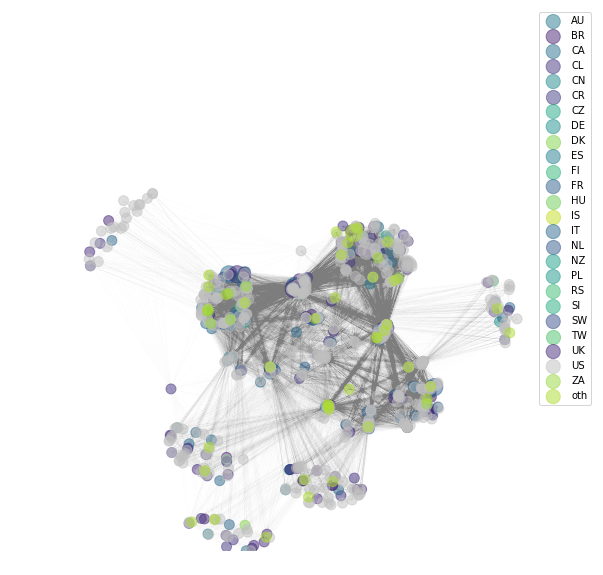

In [404]:
pl.figure(figsize=(10,10))
#
pl.xlim(-1.2,1.2)
pl.ylim(-1,1.7);
N = len(np.unique(np.array(list(countrylabel.values()))))
for i,n in enumerate(np.unique(np.array(list(countrylabel.values())))):
    #print (n)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=[x for x,y in G.nodes(data=True) if y['Nationality']==n],
                      node_color=countrycolor[n],  label=n,
                      width=0.03, alpha=alphas2, node_size=sizes)



nx.draw_networkx_edges(G,pos=pos,width=0.01, alpha=0.5)

#nx.draw(G, with_labels=False, width=0.03, alpha=0.5, node_color=p)
pl.legend();
pl.axis('off');

No handles with labels found to put in legend.


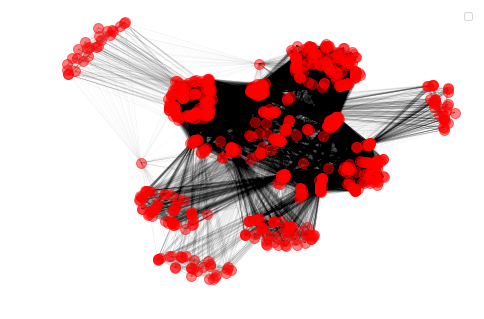

In [406]:
import pylab as pl
nx.draw(G, pos=pos, with_labels=False, width=0.03, alpha=0.5, 
        #node_color=list(c.values()), 
        cmap='viridis', node_size=100)
pl.legend()

/Users/fbb/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


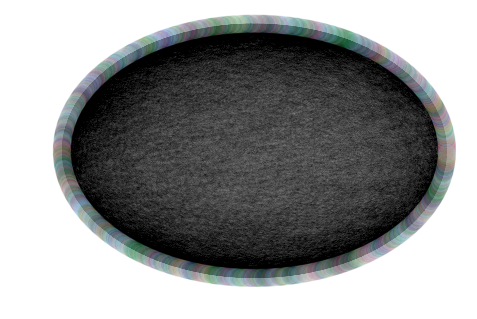

In [416]:
nx.draw_circular(G, alpha=0.1, 
                 width=0.03, node_color=[
                    properhexcolors[y['SC']] 
                     for x,y in G.nodes(data=True)])

In [417]:
import matplotlib.pyplot as plt
import networkx as nx

try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
    except ImportError:
        raise ImportError("This example needs Graphviz and either "
                          "PyGraphviz or pydot")

        
pos = graphviz_layout(G, prog='twopi', args='')
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=20, alpha=0.5, node_color="blue", with_labels=False)
plt.axis('equal')
plt.show()

IndexError: list index out of range

In [ ]:
p
my_graph.add_edges_from(edges.edges())
my_graph.add_nodes_from(nodes)
nx.apply_alpha(p, 0.5, my_graph.edges, cmap=None, vmin=None, vmax=None)
    
nx.draw(my_graph, with_labels=False, font_weight='bold')

In [ ]:
my_graph.

In [ ]:
nx.draw_networkx_edges(my_graph,  alpha=0.4)
nx.draw_networkx_nodes(my_graph,  nodelist=list(p.keys()),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Reds_r)


In [7]:
d = {0: {1: {'weight':5}, 2: {"weight":200}},
    2: {1: {'weight':10}}} # dict-of-dicts single edge (0,1)
d


{0: {1: {'weight': 5}, 2: {'weight': 200}}, 2: {1: {'weight': 10}}}

In [8]:
G = nx.Graph(d, multigraph_input =True)
nx.draw(G, with_labels=False, font_weight='bold')

NameError: name 'nx' is not defined

In [275]:
!pip install pyvis


In [ ]:
nx.

In [305]:
from pyvis.network import Network
nt = Network(notebook=True)
nxg = nx.complete_graph(40)
nt.from_nx(nxg)
nt.show("nx.html")

In [363]:
affiliationsDF

,AGN,DESC,Galaxies,Solar System,"Stars, Milky Way, and Local Volume",Statistics and Informatics,Strong Lensing,Transients and Variable Stars
name,,,,,,,,
AbellPaulAlexander,0,0,0,1,0,0,0,0
AgolEric,0,0,0,0,0,0,1,1
AguenaMichel,0,1,0,0,0,0,0,0
AguerosMarcel,0,0,0,0,0,0,1,0
AkhlaghiMohammad,0,0,1,0,0,0,0,0
AlderingGreg,0,1,0,0,0,0,0,0
AllenMark,0,0,0,0,0,0,1,0
AllenSteven,0,1,0,0,0,0,0,0
AlmeydaTriana,1,0,0,0,0,0,0,0


In [364]:
affiliationsDF.sum(axis=0)

AGN                                    54
DESC                                  215
Galaxies                              106
Solar System                           94
Stars, Milky Way, and Local Volume    237
Statistics and Informatics             70
Strong Lensing                         43
Transients and Variable Stars         237
dtype: int64

In [365]:
p

{'AbellPaulAlexander': 'SSSC',
 'AgolEric': 'TVSSC',
 'AguenaMichel': 'DESC',
 'AguerosMarcel': 'SLSC',
 'AkhlaghiMohammad': 'GalaxiesSC',
 'AlderingGreg': 'DESC',
 'AllenMark': 'SLSC',
 'AllenSteven': 'DESC',
 'AlmeydaTriana': 'AGNSC',
 'AlmoubayyedHusni': 'DESC',
 'Alonso-GarciaJavier': 'TVSSC',
 'AlonsoDavid': 'DESC',
 'AnderesEthan': 'SMWLVSC',
 'AndersonScott': 'TVSSC',
 'AndreoniIgor': 'TVSSC',
 'AnguitaTimo': 'AGNSC',
 'AnsariReza': 'GalaxiesSC',
 'AntilogusPierre': 'DESC',
 'AntoninoCucchiara': 'TVSSC',
 'AntoniucciSimone': 'TVSSC',
 'ArcaviIair': 'TVSSC',
 'ArgudoFernandezMariadelCarmen': 'SMWLVSC',
 'ArmusLee': 'SMWLVSC',
 'ArnettDavid': 'TVSSC',
 'ArnettW.David': 'GalaxiesSC',
 'AssefRoberto': 'GalaxiesSC',
 'AstierPierre': 'DESC',
 'AubourgEric': 'AGNSC',
 'AvestruzCamille': 'GalaxiesSC',
 'AwanHumna': 'SLSC',
 'BacheletEtienne': 'TVSSC',
 'BaileyStephen': 'SSSC',
 'BailynCharles': 'ISSC',
 'BaldeschiAdriano': 'TVSSC',
 'BallandChristophe': 'ISSC',
 'BalmaverdeBarbara': 'TV

In [366]:
len(p.keys())

773

In [367]:
nodes = []
for sc in df_["SC"].unique():
    nodes.append({"id": propernames[sc], "type": propernames[sc]})
for m in set(p.keys()):
    
     nodes.append({"id": m, "type": "member"})

In [368]:
nodes

[{'id': 'TVSSC', 'type': 'TVSSC'},
 {'id': 'SLSC', 'type': 'SLSC'},
 {'id': 'SMWLVSC', 'type': 'SMWLVSC'},
 {'id': 'ISSC', 'type': 'ISSC'},
 {'id': 'GalaxiesSC', 'type': 'GalaxiesSC'},
 {'id': 'AGNSC', 'type': 'AGNSC'},
 {'id': 'DESC', 'type': 'DESC'},
 {'id': 'SSSC', 'type': 'SSSC'},
 {'id': 'LanusseFrancois', 'type': 'member'},
 {'id': 'BremerMalcolm', 'type': 'member'},
 {'id': 'ChenXuelei', 'type': 'member'},
 {'id': 'GianniniTeresa', 'type': 'member'},
 {'id': 'RomaniRoger', 'type': 'member'},
 {'id': 'StuartScott', 'type': 'member'},
 {'id': 'LutzJulie', 'type': 'member'},
 {'id': 'FarnocchiaDavide', 'type': 'member'},
 {'id': 'YoungDavid', 'type': 'member'},
 {'id': 'RasmussenAndy', 'type': 'member'},
 {'id': 'DavenportJames', 'type': 'member'},
 {'id': 'AguerosMarcel', 'type': 'member'},
 {'id': 'LianMing', 'type': 'member'},
 {'id': 'OguriMasamune', 'type': 'member'},
 {'id': 'TroesterTilman', 'type': 'member'},
 {'id': 'Alonso-GarciaJavier', 'type': 'member'},
 {'id': 'Schmid

In [369]:
for s in affiliationsDF.iloc[1] [affiliationsDF.iloc[1] > 0].index:
    print(propernames[s])
print(affiliationsDF.index[1])

SLSC
TVSSC
AgolEric


In [370]:
links = []
for i in range(len(affiliationsDF)):
    for s in affiliationsDF.iloc[i] [affiliationsDF.iloc[i] > 0].index:
        links.append({"source":propernames[s], "target":affiliationsDF.index[i]})
links

[{'source': 'SSSC', 'target': 'AbellPaulAlexander'},
 {'source': 'SLSC', 'target': 'AgolEric'},
 {'source': 'TVSSC', 'target': 'AgolEric'},
 {'source': 'DESC', 'target': 'AguenaMichel'},
 {'source': 'SLSC', 'target': 'AguerosMarcel'},
 {'source': 'GalaxiesSC', 'target': 'AkhlaghiMohammad'},
 {'source': 'DESC', 'target': 'AlderingGreg'},
 {'source': 'SLSC', 'target': 'AllenMark'},
 {'source': 'DESC', 'target': 'AllenSteven'},
 {'source': 'AGNSC', 'target': 'AlmeydaTriana'},
 {'source': 'DESC', 'target': 'AlmoubayyedHusni'},
 {'source': 'SMWLVSC', 'target': 'Alonso-GarciaJavier'},
 {'source': 'TVSSC', 'target': 'Alonso-GarciaJavier'},
 {'source': 'DESC', 'target': 'AlonsoDavid'},
 {'source': 'SMWLVSC', 'target': 'AnderesEthan'},
 {'source': 'ISSC', 'target': 'AndersonScott'},
 {'source': 'TVSSC', 'target': 'AndersonScott'},
 {'source': 'TVSSC', 'target': 'AndreoniIgor'},
 {'source': 'AGNSC', 'target': 'AnguitaTimo'},
 {'source': 'SLSC', 'target': 'AnguitaTimo'},
 {'source': 'DESC', 'targ

In [371]:
import json 
with open('data.json', 'w') as fp: 
    json.dump({"nodes":nodes, "links":links}, fp)